# VTA MC - FS 2023

## Imports

In [1]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import style

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Aufgabe 1.

>Laden Sie das MNIST-Dataset mithilfe des torchvision-Pakets (Verwenden Sie das torchvision Paket für diese Aufgabe) und verwenden Sie matplotlib, um sich einen Überblick über die Daten zu verschaffen. Beschreiben Sie das grundlegenden Eigenschaften des Datensets, z.B. wie viele und welche Daten es enthält.

### Initiales Laden des Datensatz mithilfe des torchvision Pakets

Die notwendige Pakete wurden importiert und der MNIST-Datensatz wird hier mit der `torchvision`-Bibliothek heruntergeladen. Die Daten werden in 2 unterschiedliche Trainings- und Testsets aufgeteilt, so dass das Netzwerk mit binärer und multiplen kategorien angepasst werden kann.

In [2]:
DATA_DIR = "./data"

def transform(flatten=True):
    """
    Gibt eine Komposition von Transformationen zurück, die auf die Eingabedaten angewendet werden sollen.
    Es verwendet die PyTorch-Transformationsfunktionen, um die Eingabedaten in Tensoren umzuwandeln
    und optional zu flachen Vektoren zu transformieren.

    :param flatten:Gibt an, ob die Eingabedaten in flache Vektoren transformiert werden sollen. Standardmäßig auf True gesetzt.

    :returns: Eine Komposition von Transformationen, die auf die Eingabedaten angewendet werden sollen.
    """
    applied_transforms = [transforms.ToTensor()]

    if flatten:
        applied_transforms += [flatten_tensor]

    return transforms.Compose(applied_transforms)

raw_trainset = torchvision.datasets.MNIST(
    root=DATA_DIR, train=True, download=True, transform=transform(flatten=False)
)
raw_testset = torchvision.datasets.MNIST(
    root=DATA_DIR, train=False, download=True, transform=transform(flatten=False)
)


### Überblick über die Daten 

In [3]:
"Anzahl Trainingsdaten:", len(raw_trainset)

('Anzahl Trainingsdaten:', 60000)

In [4]:
"Anzahl Testdaten:", len(raw_testset)

('Anzahl Testdaten:', 10000)

In [5]:
set(raw_trainset.classes + raw_testset.classes)

{'0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine'}

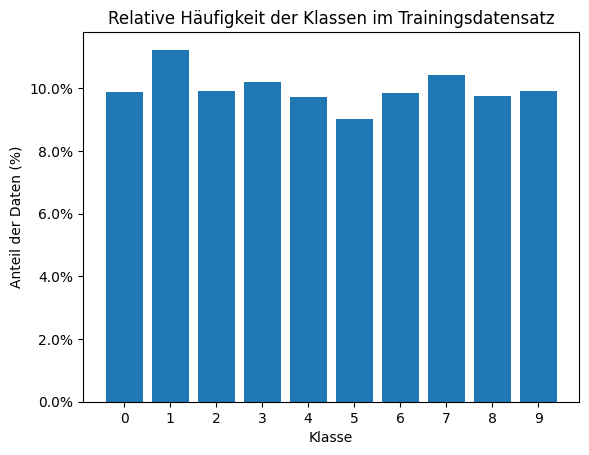

('Relative Häufigkeit der Ziffern im Trainingsdatensatz',
 {0: 9.871666666666666,
  1: 11.236666666666666,
  2: 9.93,
  3: 10.218333333333334,
  4: 9.736666666666666,
  5: 9.035,
  6: 9.863333333333333,
  7: 10.441666666666666,
  8: 9.751666666666667,
  9: 9.915000000000001})

In [6]:
def calculate_class_distribution(dataset):
    t = dict(zip(*np.unique([label for _, label in iter(dataset)], return_counts=True)))

    for k in t.keys():
        t[k] = (t[k] / len(dataset)) * 100

    return t


train_class_distribution = calculate_class_distribution(raw_trainset)

plt.bar(range(len(train_class_distribution)), list(train_class_distribution.values()))
plt.xticks(range(len(train_class_distribution)), list(train_class_distribution.keys()))
plt.title("Relative Häufigkeit der Klassen im Trainingsdatensatz")
plt.xlabel("Klasse")
plt.ylabel("Anteil der Daten (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

"Relative Häufigkeit der Ziffern im Trainingsdatensatz", train_class_distribution

('Relative Häufigkeit der Ziffern im Testdatensatz',
 {0: 9.871666666666666,
  1: 11.236666666666666,
  2: 9.93,
  3: 10.218333333333334,
  4: 9.736666666666666,
  5: 9.035,
  6: 9.863333333333333,
  7: 10.441666666666666,
  8: 9.751666666666667,
  9: 9.915000000000001})

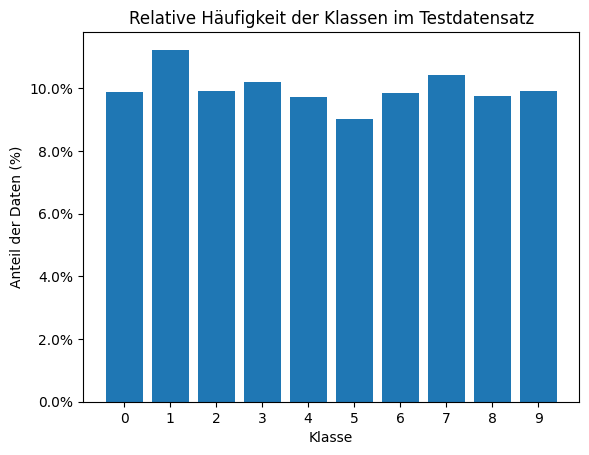

In [7]:
test_class_distribution = calculate_class_distribution(raw_trainset)

plt.bar(range(len(test_class_distribution)), list(test_class_distribution.values()))
plt.xticks(range(len(test_class_distribution)), list(test_class_distribution.keys()))
plt.title("Relative Häufigkeit der Klassen im Testdatensatz")
plt.xlabel("Klasse")
plt.ylabel("Anteil der Daten")
plt.ylabel("Anteil der Daten (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

"Relative Häufigkeit der Ziffern im Testdatensatz", test_class_distribution

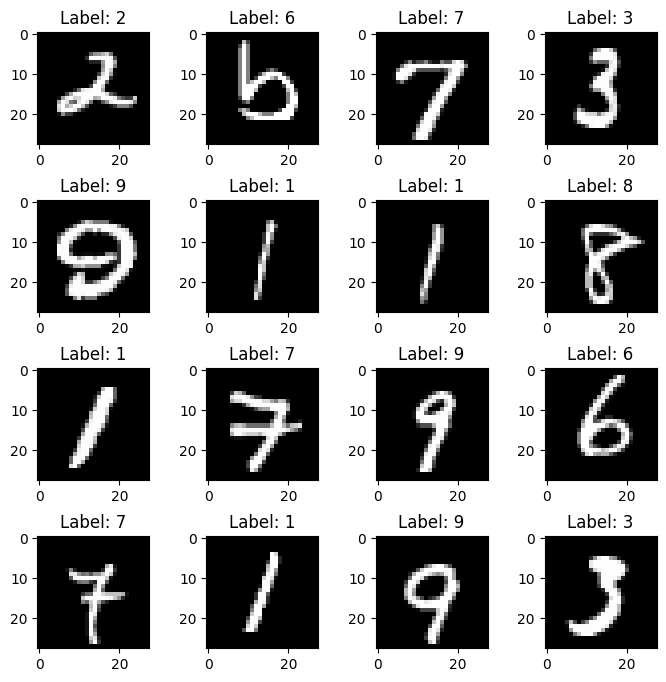

In [8]:
def imshow(img):
    npimg = img.numpy().reshape((28, 28))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

idx = np.random.randint(len(raw_trainset), size=len(axes.flatten()))

plt.title("Relative Häufigkeit der Klassen im Testdatensatz")

for i, ax in zip(idx, axes.flatten()):
    img, label = raw_trainset[i]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("on")
plt.show()

In [9]:
images, label = next(iter(raw_testset))

images.numpy().min(), images.numpy().max(), images.numpy().std(), np.unique(images.numpy()).size

(0.0, 1.0, 0.25874656, 72)

In [10]:
images.numpy().shape

(1, 28, 28)

Der ganze MNIST-Datensatz besteht aus 70'000 Bildern (Trainingsset 60'000 und Testset 10'000) von handgeschriebenen Ziffern von 0 - 9. In den beiden obigen Grafiken wird die Relative Häufigkeit für die jeweiligen Zahlen im Train- und Testtest angegeben. Sie  bewegen sich in einem Bereich von  9.04% bis 11,23% und 8.92% bis 11.35% entsprechend. Die Bilder bestehen aus 28 x 28 Pixel, welche durch ihre Graustufe charakterisiert werden (Werte zwischen 0 = Schwarz und 1 = Weiss). Insgesamt gibt es 85 unterschiedliche Graustufen. Zu jedem Bild gibt es ein Label, das die Ziffer, welche auf dem Bild dargestellt wird, angibt.

### Laden der Daten für weitere Aufgaben

In [11]:
def flatten_tensor(data):
    """
    Nimmt ein mehrdimensionales Array (Tensor) und wandelt es in einen flachen eindimensionalen
    Array (Vector) um.

    :param data: Ein mehrdimensionales Array

    :returns: Der resultierende flache Vektor.
    """
    return data.reshape((1, -1))


def classify_binary(digit: int):
    """
    Die to_binary-Funktion nimmt eine Zahl als Eingabe und gibt einen binären Vektor zurück,
    der anzeigt, ob die Zahl der Eingabe der gewünschten binären Klasse entspricht oder nicht.

    :param digit: Gibt an welche Zahl als positiv klassifiziert werden soll.

    :returns: to_binary: Einen binären Vektor, der anzeigt, ob die Zahl der gewünschten Klasse entspricht.
    """

    def to_binary(label):
        return np.array([int((label == digit))])

    return to_binary


def encode_onehot(num_classes: int):
    """
    Die onehot-Funktion nimmt eine Zahl als Eingabe und gibt einen Vektor zurück,
    der durch Einsen und Nullen kodiert ist. Die Länge des Vektors entspricht der Anzahl der Klassen,
    und die Einsen zeigen die Position der Klasse an, zu der die Eingabe gehört.

    :pram num_classes: Anzahl der Klassen, die der Vektor haben soll.

    :returns: function: Eine höhere Ordnungsfunktion, die eine andere Funktion onehot zurückgibt.
    """
    onehot_classes = np.eye(num_classes)

    def onehot(label):
        return np.array(onehot_classes[label])

    return onehot


transform_encode_onehot = transforms.Compose([encode_onehot(10)])
multi_class_trainset = torchvision.datasets.MNIST(
    root=DATA_DIR,
    train=True,
    download=True,
    transform=transform(),
    target_transform=transform_encode_onehot,
)
multi_class_testset = torchvision.datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=transform(),
    target_transform=transform_encode_onehot,
)

transform_classify_binary = transforms.Compose([classify_binary(4)])
binary_trainset = torchvision.datasets.MNIST(
    root=DATA_DIR,
    train=True,
    download=True,
    transform=transform(),
    target_transform=transform_classify_binary,
)
binary_testset = torchvision.datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=transform(),
    target_transform=transform_classify_binary,
)

## Aufgabe 2.

>Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie die Methoden forward, backward und update mithilfe von numpy. Schreiben sie geeignete Unittests, um die Funktionsweise der Funktion zu prüfen.

### Lineares Layer mit beliebig vielen Knoten

In [12]:
class LinearLayer:
    """
    Initialisiert eine lineare Schicht mit den gegebenen Eingabe- und Ausgabedimensionen
    und der optionalen Aktivierungsfunktion.

    :param input_dim: Dimension der Eingabedaten.
    :param output_dim: Dimension der Ausgabedaten.
    :param activation: Optionale Aktivierungsfunktion (Standardwert: None).
    """
    def __init__(self, input_dim, output_dim, activation=None):
        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.biases = np.zeros((1, output_dim))
        self.activation = activation

    def forward(self, x):
        """
        Führt den Vorwärtsschritt der linearen Schicht aus.
        
        :param x: Eingabedaten.
        :returns: Ausgabedaten.
        """
        self.input = x
        self.output = np.dot(x, self.weights) + self.biases
        if self.activation:
            self.output = self.activation(self.output)
        return self.output

    def backward(self, gradient):
        """
        Führt den Rückwärtsschritt der linearen Schicht aus.
        
        :param gradient: Gradient, der während des Rückwärtsschritts verwendet wird.
        :returns: Gradient für die Eingabedaten.
        """
        if self.activation:
            gradient = gradient * self.activation.gradient(self.output)
        self.weights_gradient = np.dot(self.input.T, gradient)
        self.biases_gradient = np.sum(gradient, axis=0, keepdims=True)
        self.input_gradient = np.dot(gradient, self.weights.T)
        return self.input_gradient

    def update(self, learning_rate):
        """
        Aktualisiert die Gewichte und Bias-Terme der linearen Schicht basierend auf dem Lernrate.
        
        :param learning_rate: Lernrate für die Gewichtsaktualisierung.
        """
        self.weights -= learning_rate * self.weights_gradient
        self.biases -= learning_rate * self.biases_gradient

Wenn man ein Neurales Netzwerk mit einer bestimmten Anzahl Hidden Layers erstellt, muss man bedenken, dass das Netzwerk insgesamt diese Anzahl plus eins Schichten haben muss. Dies ist so, weil man in einem neuronalen Netzwerk die Schichten zwischen der Eingabeschicht und der Ausgabeschicht zählt um die Anzahl Hidden Layers zu bestimmen. 
Die Eingabeschicht und die Ausgabeschicht sind normalerweise separate Schichten, die nicht als Hidden Layers gezählt werden, da sie eine andere Funktion im Modell haben. Die Eingabeschicht nimmt die Eingabedaten auf, während die Ausgabeschicht das Endergebnis des Modells ausgibt.


Die `class LinearLayer` ist eine Implementierung einer linearen Schicht in einem neuronalen Netzwerk, die eine Eingabe in eine Ausgabe transformiert. 
Weights und bias werden anhand von input_dim und output_dim bestimmt. Damit kann das Modell mit beliebig vielen Knoten implementiert werden. 
Die Multiplikation von 0.01 bei `self.weights = np.random.randn(input_dim, output_dim) * 0.01` erfolgt dadurch, dass Neuronale Netze beim Training mit zufälligen Gewichten initialisiert werden müssen. Wenn die Gewichte zu groß sind, kann das Netzwerk instabil werden und zu "exploding gradients" führen, was zu schlechtem Lernen oder sogar zum Absturz des Netzes führen kann. Um dies zu vermeiden, sollten die Gewichte mit kleinen zufälligen Werten initialisiert werden. Dies hilft auch, dass die Ausgabe der neuronalen Schicht nicht saturiert und erleichtert das Lernen von komplexen Funktionen. Die Wahl des genauen Werts hängt jedoch von der Anwendung und der Netzwerkarchitektur ab und muss empirisch ermittelt werden.
[(X. Glorot, Y. Bengio, 2010)](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
Im Beispiel von `layer = LinearLayer(input_dim=128, output_dim=256)` wird input_dim auf 128 gesetzt, um ein Layer mit 128 Knoten im Input zu erstellen, und output_dim auf 256 gesetzt, um ein Layer mit 256 Knoten im Output zu erstellen. 

### Unittest

In [13]:
def test_forward():
    layer = LinearLayer(2, 3)
    x = np.array([[1, 2]])
    output = layer.forward(x)
    assert output.shape == (1, 3), "Forward: Output shape mismatch"


def test_backward():
    layer = LinearLayer(2, 3)
    x = np.array([[1, 2]])
    gradient = np.array([[1, 1, 1]])  # Gradient for the backward pass
    output = layer.forward(x)
    input_gradient = layer.backward(gradient)
    assert input_gradient.shape == (1, 2), "Backward: Input gradient shape mismatch"


def test_update():
    layer = LinearLayer(2, 3)
    x = np.array([[1, 2]])
    output = layer.forward(x)
    gradient = np.array([[1, 1, 1]])
    layer.backward(gradient)
    layer.update(0.1)  # Update the weights with a learning rate of 0.1
    new_output = layer.forward(x)  # Perform the forward pass with the updated weights
    assert not np.allclose(output, new_output), "Update: Weights not updated"


def run_tests():
    test_functions = [
        name
        for name in globals()
        if name.startswith("test_") and callable(globals()[name])
    ]
    for test_function in test_functions:
        globals()[test_function]()


run_tests()

Die "setUp" Methode wird vor jedem Testfall aufgerufen und initialisiert eine Instanz der "LinearLayer"-Klasse mit einer Eingabe von 2 und einer Ausgabe von 3.

Die Methode "test_forward" prüft, ob die forward-Methode der "LinearLayer"-Klasse die erwartete Ausgabe hat, wenn eine bestimmte Eingabe gegeben ist. Es wird eine 2-dimensionale NumPy-ndarray als Eingabe gegeben, und die Methode überprüft, ob die Ausgabe der Schicht die erwartete Größe hat, nämlich (1, 3).

Die Methode "test_backward" testet, ob die backward-Methode der "LinearLayer"-Klasse die erwarteten Eingabe-Gradienten hat, wenn ein bestimmter Ausgabe-Gradient gegeben ist. Es wird eine 2-dimensionale NumPy-ndarray als Eingabe gegeben, und die Methode überprüft, ob die Ausgabe der backward-Methode die erwartete Größe hat, nämlich (1, 2).

Die Methode "test_update" testet, ob die Gewichte der "LinearLayer"-Klasse aktualisiert werden, wenn die update-Methode aufgerufen wird. Zuerst wird die forward-Methode der Schicht mit einer bestimmten Eingabe aufgerufen und dann wird die backward-Methode mit einem Gradienten aufgerufen. Die update-Methode wird dann aufgerufen und die forward-Methode wird erneut mit derselben Eingabe aufgerufen, um zu überprüfen, ob sich die Ausgabe geändert hat. Wenn die Gewichte der Schicht aktualisiert wurden, sollte die Ausgabe unterschiedlich sein.

## Aufgabe 3. 

>Erstellen Sie ein neuronales Netzwerk in numpy mit einem Hidden Linear Layer und einem Output Knoten. Trainieren Sie das Netzwerk darauf, die Ziffer 4 korrekt zu identifizieren (d.h. der Output soll 1 für diese Ziffer und 0 für alle anderen Ziffern sein). Trainieren Sie das Netzwerk auf den Trainingsdaten und evaluieren Sie es anhand von Testdaten. Verwenden Sie eine geeignete Loss- Funktion sowie Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl mit einer Abwägung der Vor- und Nachteile. Diskutieren Sie kurz weitere Optionen für Loss und Accuracy.

### Batching Utility

In [14]:
class BatchedIterator:
    def __init__(self, dataset, batch_size=32, shuffle_buffer_size=64):
        """
        Initialisiert den BatchedIterator mit dem gegebenen Datensatz, der Batch-Größe und der Puffergröße zum Mischen.
        :param dataset: Datensatz, der in Batches unterteilt werden soll.
        :param batch_size: Größe der Batches, die generiert werden sollen (Standardwert: 32).
        :param shuffle_buffer_size: Größe des Puffers zum Mischen der Daten (Standardwert: 64).
        """
        self.iterator = iter(dataset)
        self.batch_size = batch_size
        self.length = len(dataset)
        self.shuffle_buffer_size = shuffle_buffer_size
        self.buffer = []

    def _fill_buffer(self):
        """
        Füllt den internen Puffer mit Elementen aus dem Datensatz.
        """
        while len(self.buffer) < self.shuffle_buffer_size:
            try:
                self.buffer.append(next(self.iterator))
            except StopIteration:
                break

    def _sample_from_buffer(self):
        """
        Zieht zufällig ein Element aus dem internen Puffer und entfernt es.
        
        :returns: Das gezogene Element aus dem Puffer.
        """
        if len(self.buffer) > 1:
            idx = np.random.randint(0, len(self.buffer) - 1)
        else:
            idx = 0
        return self.buffer.pop(idx)

    def __iter__(self):
        """
        Gibt das BatchedIterator-Objekt als Iterator zurück.
        
        :returns: self
        """
        return self

    def __next__(self):
        """
        Generiert das nächste Batch aus dem Datensatz.
        
        :returns: Ein Tuple, das aus zwei Arrays besteht, den Eingabedaten und den zugehörigen Labels.
        :raises StopIteration: Wenn keine weiteren Batches generiert werden können.
        """
        arr_data = []
        y_true = []

        for _ in range(self.batch_size):
            self._fill_buffer()

            if len(self.buffer) > 0:
                data, label = self._sample_from_buffer()
                arr_data += [data.numpy().flatten()]
                y_true += [label]

        if not arr_data and not y_true:
            raise StopIteration

        return np.array(arr_data), np.array(y_true)

    def __len__(self):
        """
        Gibt die Anzahl der Batches zurück, die aus dem Datensatz generiert werden können.
        
        :returns: Die Anzahl der Batches.
        """
        return self.length // self.batch_size

Die BatchedIterator-Klasse in diesem Code dient dazu, ein Dataset in Minibatches aufzuteilen und diese Minibatches während des Trainings eines neuronalen Netzwerks bereitzustellen. Das Aufteilen der Trainingsdaten in kleinere Batches (auch bekannt als Minibatch Gradient Descent) ist eine häufig verwendete Technik, um den Trainingsprozess zu beschleunigen und die Speicheranforderungen zu reduzieren.

### Neuronales Netzwerk

In [15]:
class NeuralNetwork:
    def __init__(self, *layers):
        """
        Initialisiert das neuronale Netzwerk mit den gegebenen Schichten.
        
        :param layers: Eine variable Anzahl von Schichten, die im Netzwerk enthalten sein sollen.
        """
        self.layers = list(layers)

    def forward(self, x):
        """
        Führt eine Vorwärtsberechnung durch das neuronale Netzwerk durch.
        
        :param x: Eingabe-Daten, die durch das Netzwerk propagiert werden sollen.
        :returns: Ausgabe-Daten nach dem Durchlaufen des Netzwerks.
        """
        output = x
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def backward(self, gradient):
        """
        Führt eine Rückwärtsberechnung durch das neuronale Netzwerk durch.
        
        :param gradient: Gradient des Verlustes in Bezug auf die Ausgabe des Netzwerks.
        """
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient)

    def update(self, learning_rate):
        """
        Aktualisiert die Gewichte und Bias-Werte der Schichten im Netzwerk.
        
        :param learning_rate: Lernrate, mit der die Gewichte und Bias-Werte aktualisiert werden.
        """
        for layer in self.layers:
            layer.update(learning_rate)

    def _emit_metrics(self, metrics, callbacks, stage, epoch):
        """
        Sendet Metriken an alle bereitgestellten Callbacks.
        
        :param metrics: Ein Wörterbuch der Metriken, die an die Callbacks gesendet werden sollen.
        :param callbacks: Eine Liste von Callback-Funktionen, die aufgerufen werden sollen.
        :param stage: Der aktuelle Trainingsabschnitt (z.B. "training" oder "validation").
        :param epoch: Die aktuelle Epoche.
        """
        for callback in callbacks:
            callback(metrics=metrics, epoch=epoch, stage=stage)

    def _gather_time_metrics(self, metrics, train_start, epoch_start, val_start=None):
        """
        Sammelt Zeitmetriken und fügt sie zu den bereitgestellten Metriken hinzu.
        
        :param metrics: Ein Wörterbuch der Metriken, die aktualisiert werden sollen.
        :param train_start: Startzeitpunkt des Trainings.
        :param epoch_start: Startzeitpunkt der aktuellen Epoche.
        :param val_start: Startzeitpunkt der Validierung (optional).
        :returns: Das aktualisierte Metriken-Wörterbuch.
        """
        metrics["epoch_duration"] = np.datetime64("now") - epoch_start
        metrics["duration"] = np.datetime64("now") - train_start

        if val_start:
            metrics["val_duration"] = np.datetime64("now") - val_start

        return metrics

    def prepare_validation_data(self, validation_data):
        """
        Bereitet Validierungsdaten vor, indem es sie in zwei separate Arrays (Daten und Labels) umwandelt.
        
        :param validation_data: Eine Liste von Paaren (Daten, Labels) für die Validierung.
        :returns: Zwei separate Arrays für Validierungsdaten und Validierungs-Labels.
        """
        val_data, val_labels = tuple(zip(*validation_data))
        val_data = np.array([x.numpy() for x in val_data]).reshape((len(val_data), -1))
        val_labels = np.array(val_labels)

        return val_data, val_labels

    def fit(
        self,
        epochs,
        train_data,
        validation_data,
        loss_fn,
        learning_rate,
        metrics=[],
        metric_callbacks=None,
        batch_size=32,
    ):
        """
        Trainiert das neuronale Netzwerk mit den gegebenen Trainings- und Validierungsdaten.
        
        :param epochs: Anzahl der Epochen, die das Netzwerk trainiert werden soll.
        :param train_data: Trainingsdaten, die zum Trainieren des Netzwerks verwendet werden sollen.
        :param validation_data: Validierungsdaten, die zum Validieren des Netzwerks verwendet werden sollen.
        :param loss_fn: Verlustfunktion, die zum Berechnen des Verlustes während des Trainings verwendet wird.
        :param learning_rate: Lernrate, die zum Aktualisieren der Netzwerkparameter verwendet wird.
        :param metrics: Eine Liste von Metrikfunktionen, die während des Trainings berechnet werden sollen (optional).
        :param metric_callbacks: Eine Liste von Callback-Funktionen, die aufgerufen werden, wenn Metriken berechnet werden (optional).
        :param batch_size: Die Größe der zu verwendenden Minibatches (Standardwert: 32).
        """
        val_data, val_labels = self.prepare_validation_data(validation_data)

        def loss(y_pred, y_true):
            return loss_fn(y_pred, y_true)

        metrics += [loss]

        train_start = np.datetime64("now")

        for epoch in range(epochs):
            e_start = np.datetime64("now")
            e_y_pred = np.empty(shape=(0, val_labels.shape[1]))
            e_y_true = np.empty(shape=(0, val_labels.shape[1]))

            train_iter = BatchedIterator(train_data, batch_size=batch_size)
            for step, (data, y_true) in enumerate(train_iter):
                y_pred = self.forward(data)
                loss = loss_fn(y_pred, y_true)

                e_y_true = np.append(
                    e_y_true, y_true.reshape((-1, val_labels.shape[1])), axis=0
                )
                e_y_pred = np.append(
                    e_y_pred, y_pred.reshape((-1, val_labels.shape[1])), axis=0
                )

                gradient = loss_fn.gradient(y_true, y_pred)

                self.backward(gradient)
                self.update(learning_rate)

                if (
                    metrics
                    and metric_callbacks
                    and (
                        (step > 0 and step % (len(train_iter) // 10) == 0)
                        or (step == len(train_iter))
                    )
                ):

                    self._emit_metrics(
                        metrics=self._gather_time_metrics(
                            metrics={
                                metric.__name__: metric(e_y_pred, e_y_true)
                                for metric in metrics
                            },
                            train_start=train_start,
                            epoch_start=e_start,
                        ),
                        callbacks=metric_callbacks,
                        stage="training",
                        epoch=epoch,
                    )

            if metrics and metric_callbacks:
                val_start = np.datetime64("now")
                y_pred = self.forward(val_data)

                self._emit_metrics(
                    metrics=self._gather_time_metrics(
                        metrics={
                            metric.__name__: metric(e_y_pred, e_y_true)
                            for metric in metrics
                        },
                        train_start=train_start,
                        val_start=val_start,
                        epoch_start=e_start,
                    ),
                    callbacks=metric_callbacks,
                    stage="validation",
                    epoch=epoch,
                )

### Performance-Metriken

In [16]:
EPSILON = np.finfo(np.float32).eps


def precision(y_pred, y_true):
    """
    Berechnet die Precision (Genauigkeit) eines binären oder multiklassen Klassifikators,
    abhängig von der Form der Zielvariablen.

    :param y_pred: Ein Array der Vorhersagen des Klassifikators.
    :param y_true: Ein Array der wahren Labels.

    :returns: Die Precision des Klassifikators.
    """
    if y_true.shape[1] > 1:  # Multi-class classification
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_true, axis=1)
    else:  # Binary classification
        y_pred_labels = np.round(y_pred).flatten()
        y_true_labels = y_true.flatten()

    tp = np.sum((y_pred_labels == 1) & (y_true_labels == 1))
    fp = np.sum((y_pred_labels == 1) & (y_true_labels == 0))

    if tp + fp == 0:
        return 0
    else:
        return tp / (tp + fp)


def recall(y_pred, y_true):
    """
    Die Funktion recall berechnet die Wiederfindungsrate (recall), auch Sensitivität genannt,
    eines binären oder multiklassen Klassifikators.

    :param y_pred: Vorhersagen des Klassifikators.
    :param y_true: Wahrheitswerte, die den Vorhersagen entsprechen.

    :returns: float: die mittlere Wiederfindungsrate.
    """
    if y_pred.shape[1] > 1:  # Multi-class classification
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_true, axis=1)
    else:  # Binary classification
        y_pred_labels = np.round(y_pred).flatten().astype(int)
        y_true_labels = y_true.flatten().astype(int)

    tp = np.zeros(np.unique(y_true_labels).shape[0])
    fn = np.zeros_like(tp)

    for i, (pred_label, true_label) in enumerate(zip(y_pred_labels, y_true_labels)):
        if pred_label == true_label:
            tp[pred_label] += 1
        else:
            fn[true_label] += 1

    recall_per_class = tp / (tp + fn)
    overall_recall = np.mean(recall_per_class)

    return overall_recall


def f1_score(y_pred, y_true):
    """
    Berechnet den F1-Score für eine Vorhersage und die wahren Labels.
    Der F1-Score ist das harmonische Mittel aus Präzision und Recall.

    :param y_pred: Vorhergesagte Labels.
    :param y_true: Wahre Labels.

    :returns: Der F1-Score für die Vorhersage.
    """
    p = precision(y_pred, y_true)
    r = recall(y_pred, y_true)
    if p + r == 0:
        return 0
    else:
        return 2 * p * r / (p + r)


def accuracy(y_pred_probs, y_true):
    """
    Diese Funktion berechnet die Genauigkeit einer Klassifikationsvorhersage.

    :param y_pred_probs: Array mit den Vorhersagewahrscheinlichkeiten für jede Klasse.
    :param y_true: Array mit den tatsächlichen Klassen.

    :returns: Genauigkeit der Vorhersage.
    """
    if y_true.shape[1] == 1:  # binary case
        y_pred = np.round(y_pred_probs)
    else:  # multi-class case
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_true, axis=1)

    correct_predictions = np.sum(y_pred == y_true)
    return correct_predictions / y_true.shape[0]

Die `accuracy`-Funktion, die im Code verwendet wird, berechnet die Genauigkeit der binären Klassifikation (Vorhersage entweder 1 oder 0) für eine bestimmte Klasse. Für die Aufgabe, Zahlen in Bildern zu erkennen, müssen jedoch mehrere Klassen unterschieden werden, daher sollte die Accuracy-Funktion für die Multi-Klassen-Klassifikation angepasst werden, beispielsweise durch die Verwendung von Precision, Recall und F1-Score.

$\text{Precision} = \frac{TP}{TP + FP}$ 

$\text{Recall} = \frac{TP}{TP + FN}$

$\text{F1-Score} = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$

$\text{Accuracy} = \frac{\sum_{i=1}^{N} \text{correct}(f_{\theta}(x_i), y_i)}{N}$

wobei $\text{correct}(f_{\theta}(x_i), y_i)$ eine Funktion ist, die 1 zurückgibt, wenn die Vorhersage des Modells für das $i$-te Trainingsdatum korrekt ist, und 0 sonst. $N$ ist die Anzahl der Trainingsdaten.

Für unser binäres Klassifikationsproblem ist vor allem der F1-Score geeignet. Er ist nützlich, wenn man ein Gleichgewicht zwischen Precision und Recall erreichen möchten, insbesondere wenn die Verteilung der Klassen unausgewogen ist. In unserem binären Fall ist die Verteilung etwa 1:9. 
Anderseits ist die Accuracy genau wegen diesem Grund nicht geeeignet, da wenn es einfach die Mehrheitsklasse vorhersagt, eine hohe Genauigkeit aufweisen kann, ohne tatsächlich nützliche Vorhersagen zu liefern.  

Mit der gleichen Überlegung liegt es nahe im multiklassen Klassifikationsproblem den Schwerpunkt auf die Accuracy zu legen, da die Klassen, wie in den ersten zwei Grafiken ersichtlich ist, praktisch gleichverteilt sind. Aufgrund dieser Gleichverteilung macht der F1-Score auch wenig Sinn. 

Wir möchten diese Überlegung zeigen, indem wir für beide Probleme beide Metriken berechnen und dann die Unterschiede anschauen können. 

Hier ist auch die Formel für Recall und Precision ersichtlich. In unserem System liegen diese Metriken jedoch nicht im Zentrum. 
Precision ist vor allem wichtig, wenn die Kosten für falsch positive Vorhersagen hoch sind. 
Recall wenn die Kosten für falsch negative Vorhersagen hoch sind. 
Man muss jedoch wissen, für welches Umfeld man diese Neuronale Netzwerke programmiert. So könnte es z.B. in einer Bank wichtiger sein, den Schwerpunkt eher auf Precision und Recall zu legen. 

### Aktivierungsfunktionen

In [17]:
class Sigmoid:
    def __call__(self, x):
        """
        Wendet die Sigmoid-Aktivierungsfunktion auf die Eingabedaten an.

        :param x: Eingabedaten.
        :returns: Aktivierte Daten.
        """
        x = np.clip(x, -709.78, 709.78)
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        """
        Berechnet den Gradienten der Sigmoid-Aktivierungsfunktion.
        
        :param x: Eingabedaten.
        :returns: Gradient der Sigmoid-Aktivierungsfunktion.
        """
        s = self.__call__(x)
        return s * (1 - s)


class Softmax:
    def __call__(self, x):
        """
        Wendet die Softmax-Aktivierungsfunktion auf die Eingabedaten an.

        :param x: Eingabedaten.
        :returns: Aktivierte Daten.
        """
        e_x = np.exp(x - np.max(x, keepdims=True))
        return e_x / np.sum(e_x, keepdims=True)

    def gradient(self, x):
        """
        Berechnet den Gradienten der Softmax-Aktivierungsfunktion.
        
        :param x: Eingabedaten.
        :returns: Gradient der Softmax-Aktivierungsfunktion.
        """
        s = self.__call__(x)
        return s * (1 - s)


class ReLU:
    def __call__(self, x):
        """
        Wendet die ReLU-Aktivierungsfunktion auf die Eingabedaten an.

        :param x: Eingabedaten.
        :returns: Aktivierte Daten.
        """
        return np.maximum(0, x)

    def gradient(self, x):
        """
        Berechnet den Gradienten der ReLU-Aktivierungsfunktion.
        
        :param x: Eingabedaten.
        :returns: Gradient der ReLU-Aktivierungsfunktion.
        """
        return (x > 0).astype(float)

In einem neuronalen Netzwerk werden Aktivierungsfunktionen wie **Sigmoid**, **Softmax** und **ReLU** verwendet, um die Ausgaben der Neuronen in den verschiedenen Schichten zu berechnen. Die Verlustfunktion, wie die **Cross-Entropy-Funktion**, wird verwendet, um den Fehler des Netzwerks während des Trainings zu bewerten und die Gewichte und Bias-Werte entsprechend anzupassen, um die Vorhersagegenauigkeit des Netzwerks zu verbessern. Durch die Kombination von Aktivierungsfunktionen und Verlustfunktionen kann ein neuronales Netzwerk komplexe Muster in Daten lernen und präzise Vorhersagen für verschiedene Anwendungen treffen.

Folgende Aktivierungsfunktionen sind sowohl im binären wie auch im multiklassen Klassifikationsproblem vorzufinden damit wir zeigen können, wie sich die unterschiedlichen Funktionen in beiden Situationen verhalten. Die Verlustfunktionen wurden in den einzelnen Modellen separat definiert.

#### Sigmoid Funktion und Gradient:

Die Sigmoid-Funktion ist eine S-förmige Funktion, die reelle Zahlenwerte in den Bereich (0, 1) abbildet. Sie wird oft in der Ausgabeschicht von binären Klassifikationsproblemen verwendet, um Wahrscheinlichkeiten darzustellen. 
Aufgrund dieser Eigenschaften ist sie geeignet um die Ziffer 4 in den Daten zu klassifizieren.

$\sigma(x) = \frac{1}{1 + e^{-x}}$

$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$

#### Softmax Funktion und Gradient:

Die Softmax-Funktion ist eine Verallgemeinerung der Sigmoid-Funktion für mehrere Klassen. Sie wandelt eine Gruppe von reellen Zahlen in Wahrscheinlichkeiten um, die sich zu 1 addieren. 
Aufgrund dieser Eigenschaft, wird sie in unserem Netzwerk für die multiklassen Klassifikationsproblematik angewendet.

$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

$\text{softmax}'(x_i) = \text{softmax}(x_i) \cdot (1 - \text{softmax}(x_i))$

#### ReLU Funktion und Gradient:
Aufgrund der Nichtlinearität im Netztwerk, beschleunigt ReLU den Trainingsprozess im Vergleich zu Sigmoid. Wir verwenden diese Funktion auch, uda wir mit den verdeckten Schichten einen längeren Trainingsprozess erwarten. 


$\text{ReLU}(x) = \max(0, x)$

$\text{ReLU}'(x) = \begin{cases}
1, & \text{if } x > 0 \\
0, & \text{otherwise}
\end{cases}$


In [18]:
def create_store_metrics_callback(storage):
    """
    Die Funktion create_store_metrics_callback erstellt eine Callback-Funktion, 
    die verwendet wird, um während des Trainings und der Validierung Metriken wie 
    Verlust und Genauigkeit zu speichern.

    Args:
        storage: Ein Speicher-Objekt, das Metriken speichern soll

    Return:
        store_metrics: Eine Callback-Funktion, die aufgerufen wird,
        um Metriken in dem übergebenen Speicher-Objekt zu speichern.
    """

    def store_metrics(metrics, epoch, stage):
        if not epoch in storage:
            storage[epoch] = {}
        if not stage in storage[epoch]:
            storage[epoch][stage] = []
        storage[epoch][stage] = metrics

    return store_metrics


def get_metric_from_storage(storage, stage, metric_key):
    epochs = list(storage.keys())
    stage_metrics = [list(storage.values())[epoch][stage] for epoch in epochs]

    return [val_epoch[metric_key] for val_epoch in stage_metrics]

## Aufgabe 4

>Trainieren Sie das Netzwerk mit verschiedenen Lernraten und Größen des Hidden Layers. Verfolgen Sie während des Trainings die Entwicklung der Loss- und Accuracy-Funktionen auf Trainings- und Testdatensätzen und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Größe die besten Ergebnisse in geringster Zeit liefert.

### Definition Verlustfunktion

In [19]:
class BinaryCrossEntropy:
    def __call__(self, y_true, y_pred):
        y_pred_clipped = np.clip(y_pred, EPSILON, 1 - EPSILON)
        loss = -(
            y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped)
        )
        return np.mean(loss)

    def gradient(self, y_true, y_pred):
        return y_pred - y_true

#### Cross-Entropy Funktion:
Cross-Entropy ist eine häufig verwendete Verlustfunktion für Klassifikationsprobleme. Sie misst die Differenz zwischen den vorhergesagten Wahrscheinlichkeiten und den tatsächlichen Wahrscheinlichkeiten (One-Hot-Vektoren) der Zielklassen. Eine geringere Kreuzentropie zeigt an, dass die Vorhersagen des Netzwerks näher an den tatsächlichen Klassen liegen. Im Vergleich zu der ebenfalls häufig verwendeten Verlustfunktion MSE (Mean Squared Error), ist die Cross-Entropy besser in der Lage, die Unsicherheit zwischen den Vorhersagen und den tatsächlichen Werten von mehreren Klassen zu messen.
Deshalb liegt es nahe, diese Funktion in unserem multiklassen (Aufgabe 5) sowie binären Klassifikationsproblem zu integrieren. 

#### Binäre Cross-Entropy Funktion und Gradient:

$f(y_{true}, y_{pred}) = -\frac{1}{N} \sum_{i=1}^N \left(y_{true} \cdot \log(y_{pred}) + (1-y_{true}) \cdot \log(1-y_{pred})\right)$ 

$f'(y_{true}, y_{pred}) = \frac{y_{pred}-y_{true}}{y_{pred} \cdot (1-y_{pred})}$

### Model Training

In [20]:
np.random.seed(42)

input_dim = 28 * 28
output_dim = 1
epochs = 20
learning_rate = 1e-02
hidden_dim = 32

metric_storage = {}

network = NeuralNetwork(
    LinearLayer(input_dim, hidden_dim, activation=ReLU()),
    LinearLayer(hidden_dim, output_dim, activation=Sigmoid()),
)

network.fit(
    epochs=epochs,
    train_data=binary_trainset,
    validation_data=binary_testset,
    loss_fn=BinaryCrossEntropy(),
    learning_rate=learning_rate,
    metrics=[accuracy, f1_score],
    metric_callbacks=[create_store_metrics_callback(metric_storage)],
    batch_size=32,
)

### Model Auswertung

#### F1 Score

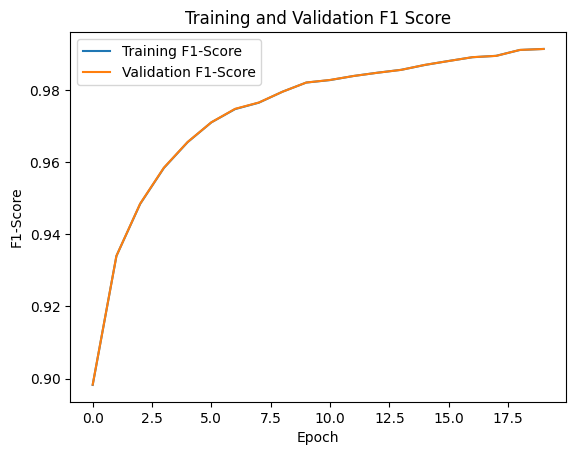

In [21]:
validation_f1 = get_metric_from_storage(metric_storage, "validation", "f1_score")
train_f1 = get_metric_from_storage(metric_storage, "training", "f1_score")

plt.plot(range(len(train_f1)), train_f1, label="Training F1-Score")
plt.plot(range(len(validation_f1)), validation_f1, label="Validation F1-Score")
plt.xlabel("Epoch"), plt.ylabel("F1-Score"), plt.title("Training and Validation F1 Score"), plt.legend();

Eine F1-Score vs Epoch Grafik zeigt die Entwicklung des F1-Scores im Verlauf der Trainingsepochen eines neuronalen Netzwerks. Die x-Achse repräsentiert die Anzahl der Epochen, während die y-Achse den F1-Score zeigt. Eine Epoche ist eine vollständige Durchsicht des gesamten Trainings- resp. Validationdatensatzes.

Der F1-Score ist ein Maß für die Leistung eines Klassifikationsmodells und berücksichtigt sowohl Präzision (Precision) als auch Sensitivität (Recall). Der F1-Score liegt zwischen 0 und 1, wobei ein höherer Wert eine bessere Leistung des Modells anzeigt.

Anstieg des F1-Scores: Ein ansteigender F1-Score im Verlauf der Epochen zeigt an, dass das Modell während des Trainings besser wird. Das bedeutet, dass das Modell die Beziehung zwischen den Eingabedaten und den zugehörigen Labels immer besser lernt.

Plateau oder Abnahme des F1-Scores: Der F1-Score erreicht ein Plateau nach ca. 18 Epochen. Dies kann darauf hindeuten, dass das Modell nicht mehr von zusätzlichen Epochen profitiert. Dies ist ebenfalls ein Zeichen dafür, dass das Modell entweder vollständig trainiert ist oder dass es beginnen würde, Overfitting zu zeigen.

F1-Score auf Trainings- und Validierungsdaten: Es ist wichtig, den F1-Score sowohl auf den Trainings- als auch auf den Validierungsdaten zu überwachen. Eine große Diskrepanz zwischen den F1-Scores auf Trainings- und Validierungsdaten kann auf Overfitting hindeuten. In dieser Grafik ist der F1-Score gegenüber Epoch für Trainings und Validation Daten  praktisch deckungsgleich, was auf ein gutes Modell hindeutet.  

#### Loss

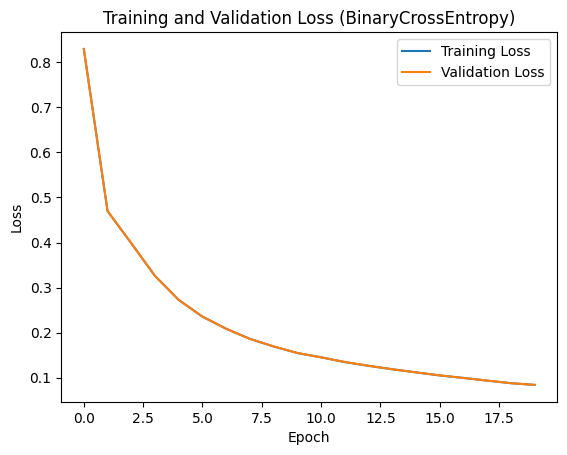

In [22]:
validation_loss = get_metric_from_storage(metric_storage, "validation", "loss")
train_loss = get_metric_from_storage(metric_storage, "training", "loss")

plt.plot(range(len(train_loss)), train_loss, label="Training Loss")
plt.plot(range(len(validation_loss)), validation_loss, label="Validation Loss")
plt.xlabel("Epoch"), plt.ylabel("Loss"), plt.title("Training and Validation Loss (BinaryCrossEntropy)"), plt.legend();


Die  Loss vs Epoch Grafik zeigt die Entwicklung des Verlusts (Loss) im Verlauf der Trainingsepochen des neuronalen Netzwerks. Die x-Achse repräsentiert die Anzahl der Epochen, während die y-Achse den Verlustwert zeigt.

Der Verlust ist ein Maß dafür, wie gut das Modell die Beziehung zwischen den Eingabedaten und den zugehörigen Labels lernt. Ein niedriger Verlustwert zeigt an, dass das Modell die zugrunde liegenden Muster in den Daten gut erfasst.

Abnahme des Verlusts: Eine Abnahme des Verlusts im Verlauf der Epochen zeigt an, dass das Modell während des Trainings besser wird. Das bedeutet, dass das Modell die Beziehung zwischen den Eingabedaten und den zugehörigen Labels immer besser lernt.

Plateau oder Anstieg des Verlusts: Ebenfalls wie in der vorherigen Grafik, profitiert das System nach ca. 18 Epochen nicht von zusätzlichen Epochen. 

Verlust auf Trainings- und Validierungsdaten: Auch in diesem Punkt kann man die Erklärung des F1-Scores übernhmen. Bei einer praktisch deckungsgleichen Kurve, kann man behaupten, dass das Modell gut trainiert ist. 

#### Confusion Matrix

In [23]:
def calculate_binary_confusion_matrix(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    tn = np.sum((true_labels == 0) & (predicted_labels == 0))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    return np.array([[tn, fp], [fn, tp]])


def calculate_mutliclass_confusion_matrix(true_labels, predicted_labels, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true_labels, predicted_labels):
        confusion_matrix[t, p] += 1
    return confusion_matrix


def plot_binary_confusion_matrix(network, dataset):
    val_data, val_labels = network.prepare_validation_data(dataset)
    y_pred = network.forward(val_data)
    confusion_matrix = calculate_binary_confusion_matrix(
        np.round(y_pred).flatten(), val_labels.flatten()
    )

    plt.imshow(confusion_matrix, cmap="Blues", interpolation="nearest")
    plt.colorbar(label="Number of predictions")
    plt.title("Confusion Matrix of Binary Classification Model")

    # Set the tick labels and add text to each cell
    tick_labels = ["Nicht 4", "4"]
    plt.xticks([0, 1], tick_labels)
    plt.yticks([0, 1], tick_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")

    for i in range(2):
        for j in range(2):
            plt.text(
                j,
                i,
                f"{confusion_matrix[i, j]} / {confusion_matrix[i, j]/len(y_pred)*100:.2f}%",
                ha="center",
                va="center",
                color="red",
            )

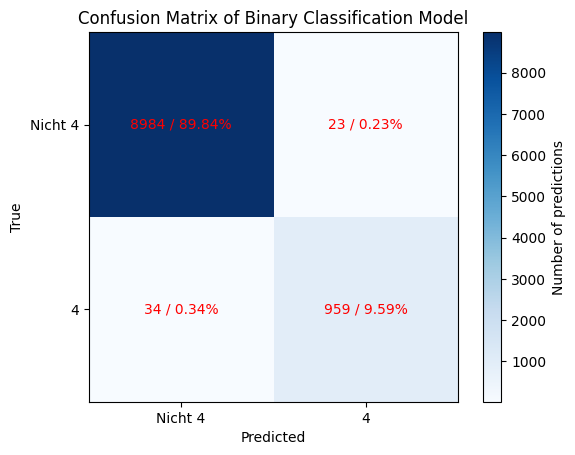

In [24]:
plot_binary_confusion_matrix(network, binary_testset)

Um diese Werte zu interpretieren, sollten wir uns zunächst klar machen, was sie bedeuten:

TP (True Positives): 89,84 % der positiven Fälle wurden korrekt als positiv identifiziert.  
FP (False Positives): 0,23 % der negativen Fälle wurden fälschlicherweise als positiv identifiziert.  
FN (False Negatives): 0,34 % der positiven Fälle wurden fälschlicherweise als negativ identifiziert.  
TN (True Negatives): 9,59 % der negativen Fälle wurden korrekt als negativ identifiziert.  

Auf den ersten Blick zeigt das Modell eine gute Leistung bei der Identifizierung der positiven Fälle (TP), da es 89,84 % der tatsächlich positiven Fälle richtig klassifiziert. Es hat auch eine relativ geringe Fehlerrate, wenn es darum geht, falsche positive und falsche negative Ergebnisse zu erzeugen (FP und FN).

Die True Negative Rate (TN) scheint im Vergleich zu den anderen Werten niedriger zu sein. Das könnte darauf hindeuten, dass das Modell Schwierigkeiten hat, die negativen Fälle korrekt zu identifizieren, oder dass die Verteilung der Klassen in den Daten unausgewogen ist, mit viel mehr positiven als negativen Fällen.

Accuracy ≈ 0,9942 oder 99,42 %
Precision ≈ 0,9974 oder 99,74 %
Recall ≈ 0,9962 oder 99,62 %
F1-Score ≈ 0,9968 oder 99,68 %

Die berechneten Metriken zeigen, dass das Modell eine hohe Genauigkeit, Präzision und Sensitivität aufweist, was darauf hindeutet, dass es sehr gut darin ist, korrekte Vorhersagen zu treffen und Fehlklassifikationen zu minimieren. Der F1-Score ist ebenfalls hoch, was auf eine gute Balance zwischen Präzision und Sensitivität hindeutet.



### Grid-Search

Es wird der Ansatz des Grid-Search verwendet, dabei werden alle Kombinationen einer Auswahl an Hyper-Parametern ausprobiert und anschliessend ausgewertet. Im Rahmen dieser Arbeit werden Lernraten und Anzahl Konten im Hidden Layer des Netzwerkes ausgewertet.

In [0]:
np.random.seed(42)

input_dim = 28 * 28
output_dim = 1
epochs = 20

binary_networks = {}
for learning_rate in [1e-02,1e-04, 1e-05]:
    for hidden_dim in [16, 128, 512]:
        network = NeuralNetwork(
            LinearLayer(input_dim, hidden_dim, activation=ReLU()),
            LinearLayer(hidden_dim, output_dim, activation=Sigmoid()),
        )
        metric_storage = {}

        binary_networks[(hidden_dim, learning_rate)] = (network, metric_storage)
        print(
            "Training Model with dimensions of hidden layer = ",
            hidden_dim,
            " / learning rate = ",
            learning_rate,
        )
        network.fit(
            epochs=epochs,
            train_data=binary_trainset,
            validation_data=binary_testset,
            loss_fn=BinaryCrossEntropy(),
            learning_rate=learning_rate,
            metrics=[accuracy, precision, recall, f1_score],
            metric_callbacks=[create_store_metrics_callback(metric_storage)],
            batch_size=32,
        )

Training Model with dimensions of hidden layer =  16  / learning rate =  0.01
Training Model with dimensions of hidden layer =  128  / learning rate =  0.01
Training Model with dimensions of hidden layer =  512  / learning rate =  0.01
Training Model with dimensions of hidden layer =  16  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  128  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  512  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  16  / learning rate =  1e-05
Training Model with dimensions of hidden layer =  128  / learning rate =  1e-05
Training Model with dimensions of hidden layer =  512  / learning rate =  1e-05


### Model Auswahl

In [26]:
def plot_metric_for_all_networks_by_epoch(networks, metric_key, metric_name, title):
    for network in list(binary_networks.keys()):
        validation_metric = get_metric_from_storage(
            binary_networks[network][1], "validation", metric_key
        )

        plt.plot(
            range(len(validation_metric)),
            validation_metric,
            label=f"h-dim: {network[0]}, lr: {network[1]}: {validation_metric[-1].astype(float):.4f}",
        )

    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(title)
    plt.show()


def plot_metric_for_all_networks_by_walltime(networks, metric_key, metric_name, title):
    for network in list(binary_networks.keys()):
        validation_metric = get_metric_from_storage(
            binary_networks[network][1], "validation", metric_key
        )
        duration = np.array(
            get_metric_from_storage(
                binary_networks[network][1], "validation", "epoch_duration"
            )
        ).cumsum()

        plt.plot(
            duration,
            validation_metric,
            label=f"h-dim: {network[0]}, lr: {network[1]}: {validation_metric[-1]:.4f}",
        )

    plt.legend()
    plt.xlabel("Seconds")
    plt.ylabel(metric_name)
    plt.title(title)
    plt.show()

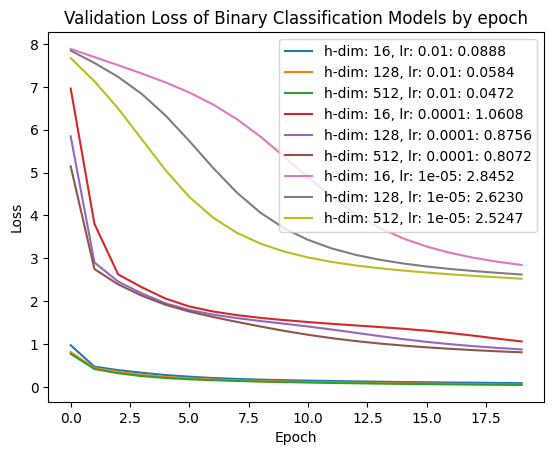

In [27]:
plot_metric_for_all_networks_by_epoch(binary_networks, 'loss', "Loss", "Validation Loss of Binary Classification Models by epoch")

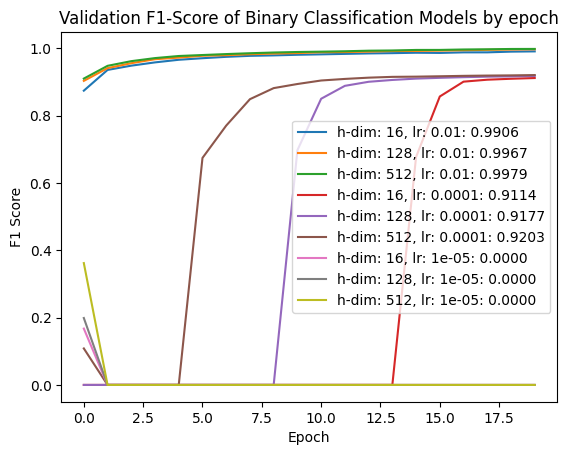

In [28]:
plot_metric_for_all_networks_by_epoch(binary_networks, 'f1_score', "F1 Score", "Validation F1-Score of Binary Classification Models by epoch")

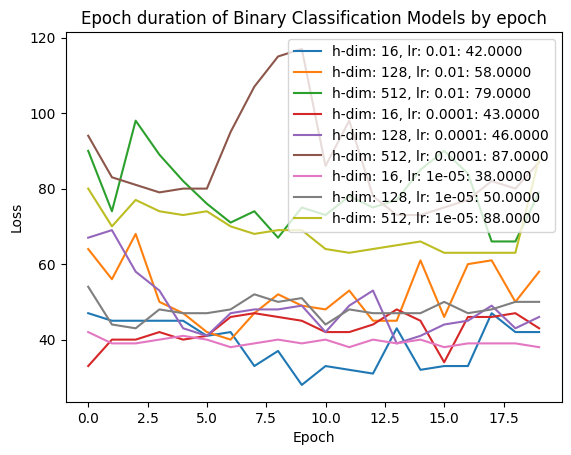

In [29]:
plot_metric_for_all_networks_by_epoch(binary_networks, 'epoch_duration', "Loss", "Epoch duration of Binary Classification Models by epoch")

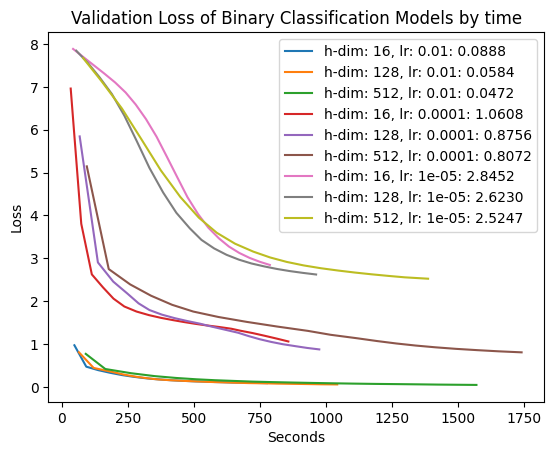

In [30]:
plot_metric_for_all_networks_by_walltime(binary_networks, 'loss', "Loss", "Validation Loss of Binary Classification Models by time")

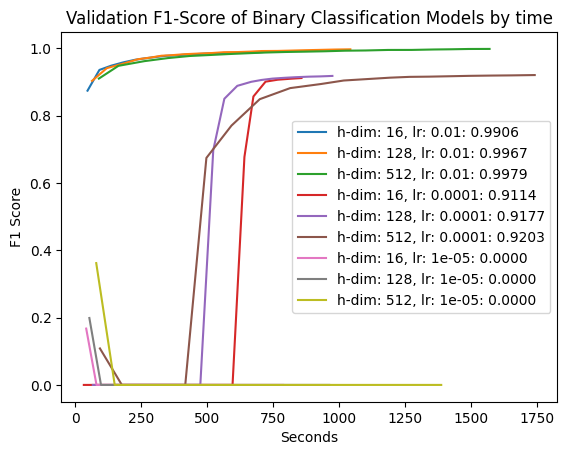

In [31]:
plot_metric_for_all_networks_by_walltime(binary_networks, 'f1_score', "F1 Score", "Validation F1-Score of Binary Classification Models by time")

Aus der Darstellung des F1-Scores geht hervor, dass die Modelle mit jeweils 128 und 512 Knoten in den versteckten Schichten und einer Lernrate von 0,01 signifikant leistungsfähiger sind als andere Kombinationen. Zudem zeigt die Darstellung des Verlustes, dass diese Netzwerke sehr nahe beieinander liegen.

Da sowohl Genauigkeit als auch Effizienz während des Trainings bewertet werden, wird dasjenige Modell verwendet, das schneller trainiert wird. In einer Produktionsumgebung wäre dies von Vorteil, da schneller experimentiert werden kann.

Unsere Auswahl für die Aufgabe der binären Klassifizierung fällt auf das Modell mit 128 Konten und einer Lernrate von 0.01 

## Aufgabe 5

> Erweitern Sie das Netzwerk auf 3 Hidden Layer mit gleicher Größe und 10 Outputs. Das Ziel ist die korrekte Klassifizierung aller Ziffern. Verwenden Sie eine geeignete Loss-Funktion sowie Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl und diskutieren Sie kurz weitere Möglichkeiten. Variieren Sie die Lernrate und die Größe der Hidden Layer und wählen Sie das beste Ergebnis aus.

### Definition Verlustfunktion

In [32]:
class CategoricalCrossEntropy:
    def __call__(self, y_true, y_pred):
        # Clip y_pred to avoid negative values and ensure probabilities are within the range [EPSILON, 1 - EPSILON]
        y_pred_clipped = np.clip(y_pred, EPSILON, 1 - EPSILON)

        n_samples = y_pred_clipped.shape[0]
        loss = -np.sum(y_true * np.log(y_pred_clipped)) / n_samples
        return loss

    def gradient(self, y_true, y_pred):
        return y_pred - y_true

#### Kategorielle Cross-Entropy Funktion und Gradient:
Wie bereits bei Aufgabe 4 erwähnt, ist für unser Klassifikationsproblem die Cross-Entropy Funktion am naheliegensten. Im Gegensatz zur vorherigen Aufgabe handelt es sich hier jedoch nicht um eine binäre, sondern um eine Kategorielle Cross-Entropy Funktion. 

$f(y_{true}, y_{pred}) = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{true,j} \cdot \log(y_{pred,j})$

$f'(y_{true}, y_{pred}) = \frac{1}{N} \sum_{i=1}^N y_{pred} - y_{true}$

### Grid-Search

Wie bereits in Aufgabe 4 wird ein Grid-Seach über kombinationen von Learnraten und Anzahl Konten im Hidden-Layer angewendet.

In [0]:
np.random.seed(42)

# Initialisierung von Variablen
input_dim = 28 * 28
output_dim = 10
epochs = 20

multi_class_networks = {}
# Schleifen zur Durchprobierung von Hyperparameter-Kombinationen
for learning_rate in [1e-02, 1e-04, 1e-05]:
    for hidden_dim in [16, 128, 512]:
        # Erstellung von neuronalen Netzen mit unterschiedlichen Hyperparametern
        network = NeuralNetwork(
            LinearLayer(input_dim, hidden_dim, activation=ReLU()),
            LinearLayer(hidden_dim, hidden_dim, activation=ReLU()),
            LinearLayer(hidden_dim, hidden_dim, activation=ReLU()),
            LinearLayer(hidden_dim, output_dim, activation=Softmax()),
        )
        metric_storage = {}
        multi_class_networks[(hidden_dim, learning_rate)] = (network, metric_storage)
        # Ausgabe der Hyperparameter-Kombination
        print(
            "Training Model with dimensions of hidden layer = ",
            hidden_dim,
            " / learning rate = ",
            learning_rate,
        )
        # Training der Netze mit den entsprechenden Daten und Hyperparametern
        network.fit(
            epochs=epochs,
            train_data=multi_class_trainset,
            validation_data=multi_class_testset,
            loss_fn=CategoricalCrossEntropy(),
            learning_rate=learning_rate,
            # Verwendung von Metriken und Metrik-Callbacks zur Überwachung des Trainingsprozesses.
            metrics=[accuracy, precision, recall, f1_score],
            metric_callbacks=[create_store_metrics_callback(metric_storage)],
            batch_size=32,
        )

Training Model with dimensions of hidden layer =  16  / learning rate =  0.01
/tmp/ipykernel_75/145221726.py:31: RuntimeWarning: invalid value encountered in subtract
  e_x = np.exp(x - np.max(x, keepdims=True))
Training Model with dimensions of hidden layer =  128  / learning rate =  0.01
Training Model with dimensions of hidden layer =  512  / learning rate =  0.01
Training Model with dimensions of hidden layer =  16  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  128  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  512  / learning rate =  0.0001
Training Model with dimensions of hidden layer =  16  / learning rate =  1e-05
Training Model with dimensions of hidden layer =  128  / learning rate =  1e-05
Training Model with dimensions of hidden layer =  512  / learning rate =  1e-05


### Model Auswahl

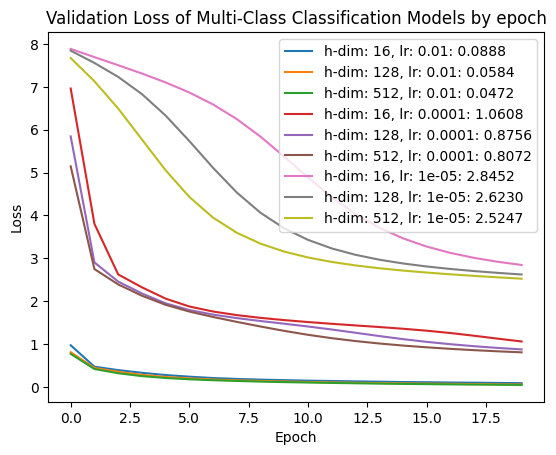

In [34]:
plot_metric_for_all_networks_by_epoch(multi_class_networks, 'loss', "Loss", "Validation Loss of Multi-Class Classification Models by epoch")

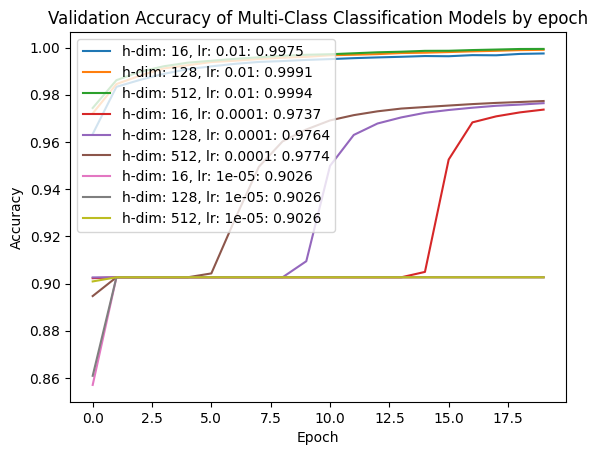

In [35]:
plot_metric_for_all_networks_by_epoch(multi_class_networks, 'accuracy', "Accuracy", "Validation Accuracy of Multi-Class Classification Models by epoch")

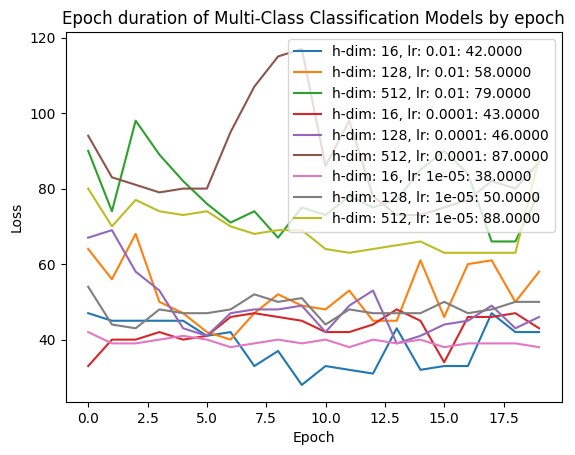

In [36]:
plot_metric_for_all_networks_by_epoch(multi_class_networks, 'epoch_duration', "Loss", "Epoch duration of Multi-Class Classification Models by epoch")

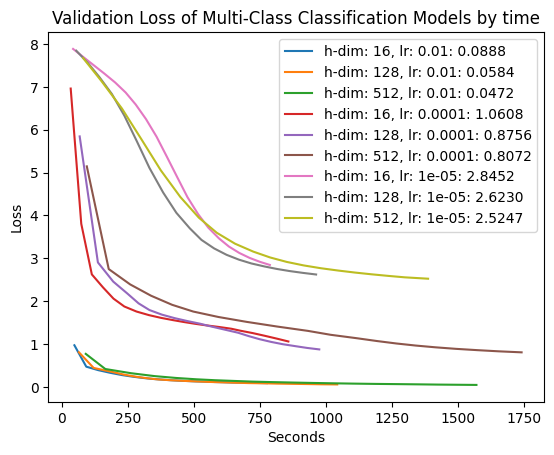

In [37]:
plot_metric_for_all_networks_by_walltime(multi_class_networks, 'loss', "Loss", "Validation Loss of Multi-Class Classification Models by time")

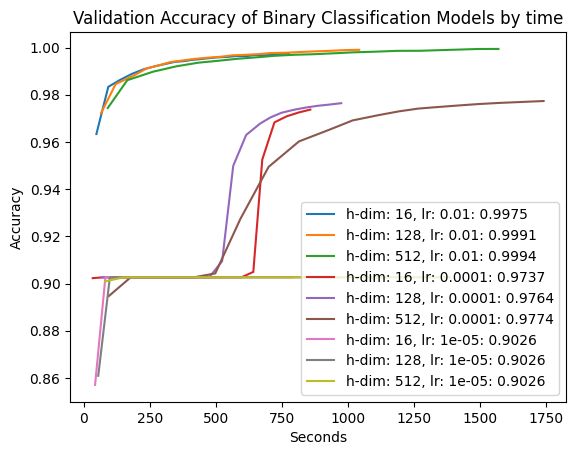

In [38]:
plot_metric_for_all_networks_by_walltime(multi_class_networks, 'accuracy', "Accuracy", "Validation Accuracy of Binary Classification Models by time")

Der allgemeine Output zeigt uns, dass die Modelle jeweils etwa gleich schlecht sind. Mit einer Genauigkeit von 9 bis 12 % liegen diese somit auch im Bereich der Genauigkeit von zufälligem Raten der jeweiligen Zahl.

Im Allgemeinen schneiden jedoch  diejenigen Modelle mit mehr Konten in den Hidden-Layer besser ab, als jene mit weniger. Somit ersehen wir das Modell mit 512 Konten und einer Lern-Rate von 0.0001 am effektivsten.

## Zusammenfassung


Aufgrund fehlender Rechenzeit ist es uns leider nicht möglich definitiv zu entscheiden, welche Kombination von Hyperparametern das Multiklassen-Modell am besten trainieren würde. Aufgrund von Überlegungen können wir jedoch herleiten, dass alle Modelle gleich schlecht abschneiden würden.

Rückblickend würden wir uns mehr Zeit für das Trainieren und Testen eines grösseren Netzwerkes einplanen, um optimale Metriken zu erhalten.
Wir sind jedoch froh, dass unser Single Layer Modell mit binärer Klassifikation hervorragende Resultate erzielt hat. Man könnte sich überlegen, ob diese Werte zu gut sind und auf einen Rechenfehler zurückzuführen sind.
Weitere Berechnungen sind von Nöten, um ein optimales binäres sowie Multiklassen-Modell zu erreichen.


## Lerntagebuch

Die Challenge haben wir am 28. März 2023 erhalten und das Abgabedatum ist am 23. April 2023. Wir hatten also 4 Wochen Zeit, das Projekt zu bearbeiten.

### Woche 1

Bevor wir mit der Challenge und dem Programmieren gestartet haben, mussten wir uns erst das nötige Wissen zu Gradient Descent und Neuronalen Netzwerken aneignen. Dies haben wir zum einen mit den Lernmaterialien und Lernvideos gemacht, zum anderen aber auch mit Chat-GPT für spezifische Fragen. Hier haben wir beispielsweise gefragt, wie Backpropagation funktioniert oder wofür welche Aktivierungsfunktionen im Zusammenhang mit Neuronalen Netzwerken am besten geeignet sind.

### Woche 2
Anschliessend haben wir uns ans Coden gesetzt, wo auch kontinuierlich dazugelernt wurde. Bevor wir Chat-GPT die konkreten Fragen gestellt haben, gaben wir ihm die Grundlagen und Randbedingungen der Challenge. Bereits beim Einlesen des Datensets übergaben wir Chat-GPT den Prompt "MNIST Datensatz einlesen mithilfe torchvision-packet". Anschliessend hatten wir einige Ideen zu der Exploration, hier fragten wir Chat-GPT nach Code um z.B. einige Beispiele der Bilder sowie die Häufigkeiten der verschiedenen Klassen zu plotten. Im Anschluss haben wir dem Sprachmodell für die Aufgabe 2 direkt Teilaufgaben übergeben, wie z. B. “Erstell eine Klasse für ein lineares Layer mit beliebig vielen Knoten inkl. den Methoden forward, backward und update” und "Schreibe Unittest zu den Funktionen". Den erhaltenen Code wurde ins Notebook kopiert und getestet. Zugleich fragten wir Chat-GPT nach einer Reflektion des eigenen Codes, allfälligen Anpassungen und bei falls uns etwas unklar erschien oder kein Sinn ergab, fragten wir nach Erklärungen und Überarbeitungen.

### Woche 3
Zu Beginn konnte Chat-GPT relativ effizient und fehlerfrei unterstützen. Ab der Aufgabe 3 mussten wir die Fragen vermehrt aufteilen und jeweils nur Teilfragen stellen, da Chat-GPT Schwierigkeiten hatte, komplexere Probleme zu lösen. Hier baten wir Chat-GPT zuerst, uns die Aktivierungsfunktionen (z.B. Sigmoid oder ReLU) sowie die Loss- und Accuracy-Funktionen und wo nötig auch gleich den Gradienten zu definieren. Hierzu haben wir gefragt, welche Aktivierungsfunktion sich für das Netzwerk und den binären Output am besten eignet. Anschliessend fragten wir nach einem neuronalen Netzwerk (mit numpy) mit einem Hidden Linear Layer und einem Output Knoten. Die Funktionen mussten wir teils selbst implementieren. Trotz den komplexeren Aufgaben war Chat-GPT weiterhin hilfreich, da es uns oft eine Richtung oder einen Hinweis auf die Lösung gegeben hat, den wir zuvor nicht gesehen hatten. Wenn wir dennoch nicht weiterkamen und mit Chat-GPT in eine Sackgasse gelangten, holten wir uns die Informationen und nötigen Gedankenanstosse aus anderen Quellen. Die selbe Vorgehensweise hatten wir mit dem Netzwerk mit mehreren Klassen, hier bedurfte es noch mehrere Korrekturen und Überarbeitungen. Um dies einzurichten, mussten wir uns jedoch auch tiefer mit der Materie beschäftigen und es besser verstehen.

### Woche 4
In der letzten Woche kümmerten wir uns um das trainieren und testen der Netzwerke. Auch hier gingen wir wieder auf Chat-GPT zu mit Fragen wie "Wie wird die Lernrate für neuronale Netzwerke bestimmt?" und "Dimensionen hidden Layer bestimmen". Ausserdem evaluierten wir die verschiedenen Hyperparameter, um den bestmöglichen Wert für das optimale Modell zu erhalten. Zusätzlich setzten wir uns mit dem plotten der Entwicklung der verschiedenen Hyperparameter über die Epochen auseinander. Das Modell musste ausserdem noch verbessert werden, damit es sauber lauft. Da von uns 3 niemand gross Erfahrung hatte mit Neuronalen Netzwerken hatte, brachte die Challenge eine gewisse Herausforderung mit sich. Durch das direkte Eintauchen in das Thema konnten wir hierbei jedoch viel Lernen.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58d99a69-bb1e-49eb-85d2-76b4e4a0b4d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>